In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable

In [ ]:
# from visdom import Visdom
# viz = Visdom()

In [68]:
num_data = 1000
num_epoch = 1000

noise = init.normal(torch.FloatTensor(num_data,1),std=5)
x = init.uniform(torch.Tensor(num_data,1),-10,10)

y = 2*x + 3
y_noise = 2*x +3 + noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  """


In [69]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

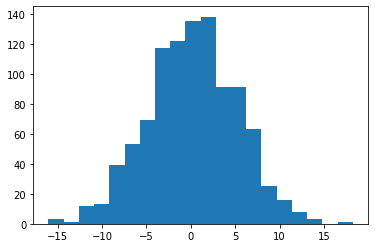

In [70]:
plt.hist(noise.numpy(),bins=20)
plt.show

<function matplotlib.pyplot.show>

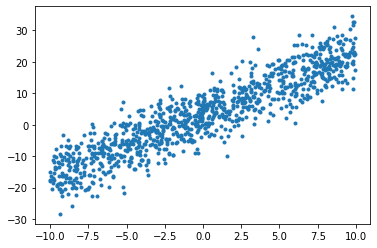

In [71]:
plt.plot(x,y_noise,'.')
plt.show

In [72]:
model = nn.Linear(1,1)
output = model(x)
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [73]:
model.parameters()

<generator object Module.parameters at 0x7f0281e55250>

In [79]:
loss_arr = []
label = y_noise

for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output,label)
  loss.backward()
  optimizer.step()

  if i % 10 == 0:
    print(loss)

  loss_arr.append(loss.data.numpy())

tensor(319.1378, grad_fn=<MseLossBackward>)
tensor(31.3228, grad_fn=<MseLossBackward>)
tensor(29.1649, grad_fn=<MseLossBackward>)
tensor(27.7243, grad_fn=<MseLossBackward>)
tensor(26.7626, grad_fn=<MseLossBackward>)
tensor(26.1205, grad_fn=<MseLossBackward>)
tensor(25.6918, grad_fn=<MseLossBackward>)
tensor(25.4057, grad_fn=<MseLossBackward>)
tensor(25.2146, grad_fn=<MseLossBackward>)
tensor(25.0871, grad_fn=<MseLossBackward>)
tensor(25.0019, grad_fn=<MseLossBackward>)
tensor(24.9451, grad_fn=<MseLossBackward>)
tensor(24.9071, grad_fn=<MseLossBackward>)
tensor(24.8818, grad_fn=<MseLossBackward>)
tensor(24.8649, grad_fn=<MseLossBackward>)
tensor(24.8536, grad_fn=<MseLossBackward>)
tensor(24.8460, grad_fn=<MseLossBackward>)
tensor(24.8410, grad_fn=<MseLossBackward>)
tensor(24.8376, grad_fn=<MseLossBackward>)
tensor(24.8354, grad_fn=<MseLossBackward>)
tensor(24.8339, grad_fn=<MseLossBackward>)
tensor(24.8329, grad_fn=<MseLossBackward>)
tensor(24.8322, grad_fn=<MseLossBackward>)
tensor(24.

In [80]:
param_list = list(model.parameters())
print(param_list[0].data, param_list[1].data)

tensor([[1.9769]]) tensor([3.2268])


In [81]:
loss_arr

[array(319.1378, dtype=float32),
 array(69.23904, dtype=float32),
 array(38.121674, dtype=float32),
 array(33.97748, dtype=float32),
 array(33.16945, dtype=float32),
 array(32.7843, dtype=float32),
 array(32.462578, dtype=float32),
 array(32.159527, dtype=float32),
 array(31.869213, dtype=float32),
 array(31.590483, dtype=float32),
 array(31.322803, dtype=float32),
 array(31.065725, dtype=float32),
 array(30.818825, dtype=float32),
 array(30.581701, dtype=float32),
 array(30.353971, dtype=float32),
 array(30.135258, dtype=float32),
 array(29.925201, dtype=float32),
 array(29.723469, dtype=float32),
 array(29.529722, dtype=float32),
 array(29.34365, dtype=float32),
 array(29.164946, dtype=float32),
 array(28.993317, dtype=float32),
 array(28.828484, dtype=float32),
 array(28.67018, dtype=float32),
 array(28.518143, dtype=float32),
 array(28.372126, dtype=float32),
 array(28.231892, dtype=float32),
 array(28.097218, dtype=float32),
 array(27.96787, dtype=float32),
 array(27.843647, dtype

<function matplotlib.pyplot.show>

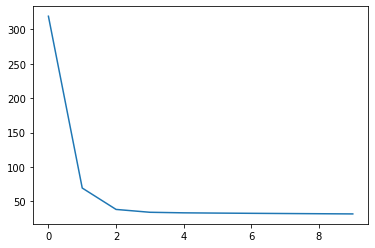

In [82]:
plt.plot(range(0,10), loss_arr[:10])
plt.show

<function matplotlib.pyplot.show>

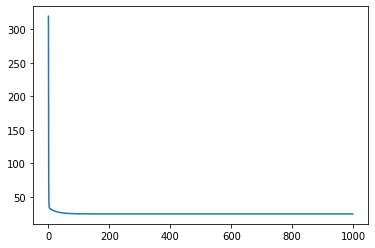

In [83]:
plt.plot(loss_arr)
plt.show